In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
insurance_df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv')

In [8]:
insurance_df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [9]:
X1 = insurance_df['age']
y = insurance_df['bought_insurance']

In [11]:
X1 = X1.values.reshape(-1,1)

In [13]:
y = y.values.reshape(-1,1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.1)
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/ronitguptaaa/opt/anaconda3/envs/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
y_pred = model.predict(X1)

In [18]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0])

In [19]:
insurance_df['bought_insurance_predicted'] = y_pred

In [20]:
insurance_df['bought_insurance'] = insurance_df['bought_insurance'].map({0:'no', 1:'yes'})
insurance_df['bought_insurance_predicted'] = insurance_df['bought_insurance_predicted'].map({0:'no', 1:'yes'})

In [21]:
insurance_df

,age,bought_insurance,bought_insurance_predicted
0,22,no,no
1,25,no,no
2,47,yes,yes
3,52,no,yes
4,46,yes,yes
5,56,yes,yes
6,55,no,yes
7,60,yes,yes
8,62,yes,yes
9,61,yes,yes


In [25]:
accuracy = accuracy_score(y, y_pred)

In [26]:
accuracy

0.8888888888888888

In [27]:
cm = confusion_matrix(y, y_pred)

In [28]:
cm

array([[11,  2],
       [ 1, 13]])

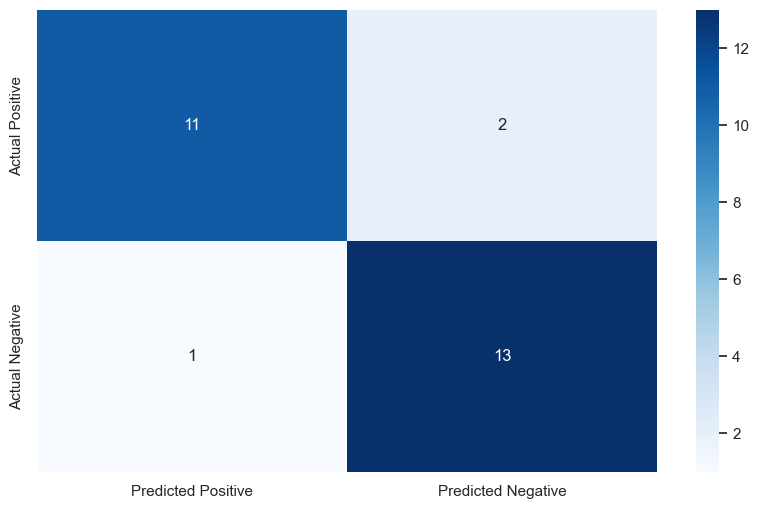

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
plt.show()